In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [18]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [19]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        # 解码器
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 创建模型实例
model = Autoencoder()

In [20]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.view(-1, 28 * 28)  # 将图像展平为向量

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0268
Epoch [2/20], Loss: 0.0221
Epoch [3/20], Loss: 0.0195
Epoch [4/20], Loss: 0.0159
Epoch [5/20], Loss: 0.0156
Epoch [6/20], Loss: 0.0114
Epoch [7/20], Loss: 0.0142
Epoch [8/20], Loss: 0.0130
Epoch [9/20], Loss: 0.0091
Epoch [10/20], Loss: 0.0114
Epoch [11/20], Loss: 0.0082
Epoch [12/20], Loss: 0.0097
Epoch [13/20], Loss: 0.0078
Epoch [14/20], Loss: 0.0091
Epoch [15/20], Loss: 0.0092
Epoch [16/20], Loss: 0.0073
Epoch [17/20], Loss: 0.0089
Epoch [18/20], Loss: 0.0082
Epoch [19/20], Loss: 0.0075
Epoch [20/20], Loss: 0.0080


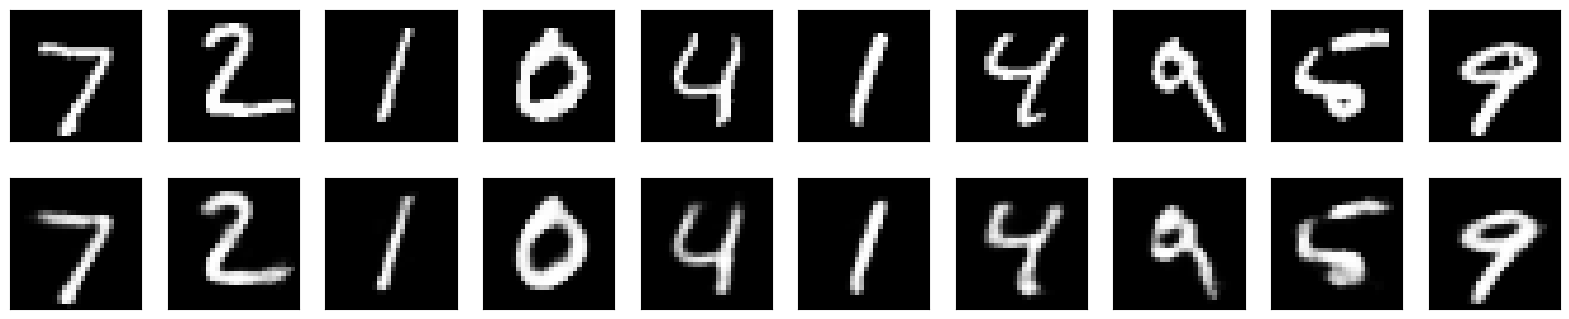

In [22]:
# 加载测试数据
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)

# 获取一些测试数据
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images_flat = images.view(-1, 28 * 28)

# 使用模型进行重建
outputs = model(images_flat)

# 可视化原始图像和重建图像
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

for images, row in zip([images, outputs], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.view(28, 28).detach().numpy(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()
